## 🧠 Desafio do Datathon – Aplicação de IA em Recrutamento

Este projeto foi desenvolvido como parte do **Datathon de Data Analytics**, cujo desafio era propor uma solução com **Inteligência Artificial aplicada ao processo de recrutamento** da empresa **Decision** — especializada em bodyshop e alocação de talentos no setor de tecnologia.

### 🎯 Objetivo
Criar um MVP com uso de técnicas de IA e Machine Learning capaz de:

- Padronizar e apoiar a análise de entrevistas e currículos
- Identificar padrões de candidatos com bom desempenho histórico
- Ajudar os hunters a entender o **nível de aderência dos candidatos** às vagas abertas, com base em:
  - Hard Skills
  - Soft Skills
  - Idiomas
  - Formação Acadêmica
  - Experiência Profissional
  - Engajamento e Motivação

---

### 🛠️ Entregáveis

- **Notebook analítico completo**: com EDA, pré-processamento, vetorização textual e treinamento de modelo.
- **Aplicação interativa (Streamlit)**: que permite a triagem automática de candidatos com base nas categorias avaliadas.
- **Repositório GitHub** com toda a estrutura do projeto.

Nesta etapa, importamos as bibliotecas necessárias para leitura, manipulação de dados e construção do modelo.

In [ ]:
import pandas as pd

### Leitura e estruturação da base de candidatos (applicants.json)
Neste passo, carregamos a base de candidatos em formato JSON. A estrutura original está aninhada em campos como "infos_basicas", "informacoes_pessoais", "formacao_e_idiomas" etc. Utilizamos pd.json_normalize para transformar esses dados em colunas tabulares e, em seguida, unificamos todos os blocos em um único DataFrame (df_applicants).

In [ ]:
df_applicants = pd.read_json('applicants.json', orient='index')

infos_basicas = pd.json_normalize(df_applicants['infos_basicas'])
informacoes_pessoais = pd.json_normalize(df_applicants['informacoes_pessoais'])
informacoes_profissionais = pd.json_normalize(df_applicants['informacoes_profissionais'])
formacao_e_idiomas = pd.json_normalize(df_applicants['formacao_e_idiomas'])
cargo_atual = pd.json_normalize(df_applicants['cargo_atual'])

df_applicants = pd.concat([infos_basicas, informacoes_pessoais, informacoes_profissionais, formacao_e_idiomas, cargo_atual], axis=1)

df_applicants.tail(20)

,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
42462,,(21) 98098-4662,Crm,14-03-2018 16:18:13,pelo próprio candidato,sra._aurora_costa@hotmail.com,,Outros,14-03-2018 16:18:13,5980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42463,,(11) 95290-7692,Crm,14-03-2018 16:18:48,pelo próprio candidato,liam_leão@gmail.com,,Outros,14-03-2018 16:18:48,5981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42464,,(11) 97372-9073,Crm,14-03-2018 16:19:19,pelo próprio candidato,srta._ana_vitória_nascimento@hotmail.com,,Outros,14-03-2018 16:19:19,5982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42465,,(11) 96532-9131,Crm,14-03-2018 16:19:50,pelo próprio candidato,júlia_pastor@hotmail.com,,Outros,14-03-2018 16:19:50,5983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42466,,(11) 96051-4866,Crm,14-03-2018 16:20:16,pelo próprio candidato,antônio_das_neves@hotmail.com,,Outros,14-03-2018 16:20:16,5984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42467,,(19) 96972-4404,Crm,14-03-2018 16:20:47,pelo próprio candidato,sr._eduardo_melo@gmail.com,,Outros,14-03-2018 16:20:47,5985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42468,,(11) 91118-4317,Crm,14-03-2018 16:21:42,pelo próprio candidato,gustavo_henrique_correia@gmail.com,,Outros,14-03-2018 16:21:42,5986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42469,,(11) 99150-7417,Crm,14-03-2018 16:22:15,pelo próprio candidato,sr._arthur_gabriel_da_rosa@gmail.com,,Outros,14-03-2018 16:22:15,5987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42470,,(11) 98893-3066,Crm,14-03-2018 16:23:26,pelo próprio candidato,dr._daniel_freitas@hotmail.com,,Outros,14-03-2018 16:23:26,5988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42471,,(34) 93778-8729,Crm,14-03-2018 16:24:39,pelo próprio candidato,dr._igor_sá@gmail.com,,Outros,14-03-2018 16:24:39,5989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Leitura e estruturação da base de vagas (vagas.json)

Carregamos o arquivo vagas.json, que contém os detalhes das oportunidades abertas, estruturadas com informações aninhadas. O campo codigo_vaga é tratado como identificador único. Em seguida, usamos json_normalize para extrair as seções: informacoes_basicas, perfil_vaga e beneficios. Por fim, unificamos todas as colunas em um único DataFrame (df_vagas_final) para facilitar as análises posteriores.

In [ ]:
# df_vagas = pd.read_json('vagas.json', orient='index')

# df_info_basicas = pd.json_normalize(df_vagas['informacoes_basicas'])
# df_perfil_vaga = pd.json_normalize(df_vagas['perfil_vaga'])
# df_beneficios = pd.json_normalize(df_vagas['beneficios'])

# df_vagas = pd.concat([df_info_basicas, df_perfil_vaga, df_beneficios], axis=1)

# df_vagas.tail()



# Carrega o JSON com o código da vaga como índice
df_vagas = pd.read_json('vagas.json', orient='index')

# Transforma o índice (código da vaga) em coluna
df_vagas.reset_index(inplace=True)
df_vagas.rename(columns={'index': 'codigo_vaga'}, inplace=True)

# Normaliza as colunas aninhadas
df_info_basicas = pd.json_normalize(df_vagas['informacoes_basicas'])
df_perfil_vaga = pd.json_normalize(df_vagas['perfil_vaga'])
df_beneficios = pd.json_normalize(df_vagas['beneficios'])

# Concatena tudo, mantendo a coluna 'codigo_vaga'
df_vagas_final = pd.concat([df_vagas[['codigo_vaga']], df_info_basicas, df_perfil_vaga, df_beneficios], axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Visualiza as últimas linhas
df_vagas_final.tail()

,codigo_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,tipo_contratacao,prazo_contratacao,objetivo_vaga,prioridade_vaga,origem_vaga,superior_imediato,nome,telefone,data_inicial,data_final,nome_substituto,pais,estado,cidade,bairro,regiao,local_trabalho,vaga_especifica_para_pcd,faixa_etaria,horario_trabalho,nivel profissional,nivel_academico,nivel_ingles,nivel_espanhol,outro_idioma,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
14076,12368,28-02-2024,31-03-2024,PMP 5203658 - Dynamics,Não,Miller-Curry,Guilherme Campos,Decision Campinas,Sra. Juliana Oliveira,Sra. Joana Sousa,CLT Full,Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,,,NaN,NaN,NaN,Brasil,São Paulo,São Paulo,,,2000,,De: Até:,,Analista,Ensino Superior Completo,Nenhum,,,TI - Desenvolvimento/Programação-,Dynamics,Dynamics,,,,NaN,"123,00 -",APPLICATION DEVELOPER-MICROSOFT ANALYTICS - ba...,
14077,12367,28-02-2024,29-02-2024,MM com IM - FSR 3910,Não,Bishop-Reed,Lívia Vasconcelos,Decision São Paulo,Manuella Jesus,Srta. Bella Ferreira,"CLT Full, PJ/Autônomo",Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,,,NaN,NaN,NaN,Brasil,São Paulo,São Paulo,,,2000,,De: Até:,,Analista,Ensino Superior Completo,Avançado,Básico,,TI - Projetos-,1 Deve ter boa experiência em configuração de ...,inglês avançado: (tem que se comunicar com o G...,FSR: 3910,Não,,NaN,168 -,Fechado,
14078,12366,27-02-2024,29-02-2024,964 - Assistente fiscal ou financeiro,Não,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,Maria Lopes,Maria Clara Pires,"CLT Full, PJ/Autônomo",Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,,,NaN,NaN,NaN,Brasil,São Paulo,São Paulo,,,2000,,De: Até:,,Analista,Ensino Superior Completo,Básico,Básico,Português Básico,TI - Projetos-,Qualificações técnicas: conhecimento básico em...,"Local: Alphaville, Barueri\nQual região: SP\nI...","Modelo de trabalho: Hibrido, 3 vezes por seman...",Não,,NaN,168 -,Fechado,
14079,12365,27-02-2024,29-02-2024,966 - Analista pleno ou sênior de área fiscal,Não,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,Maria Lopes,Melina Montenegro,"CLT Full, PJ/Autônomo",Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,,,NaN,NaN,NaN,Brasil,São Paulo,Barueri,,Grande São Paulo,2000,,De: Até:,,Sênior,Ensino Superior Completo,Básico,Básico,Português Básico,TI - Projetos-,Qualificações técnicas: apuração de impostos r...,"Local: Alphaville, Barueri, SP.\nQual região: ...","Modelo de trabalho: Hibrido, 3 vezes por seman...",Não,,NaN,168 -,Fechado,
14080,12364,27-02-2024,29-02-2024,965 - Assistente ou analista de área contábil,Não,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,Maria Lopes,Laura Pacheco,"CLT Full, PJ/Autônomo",Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,,,NaN,NaN,NaN,Brasil,São Paulo,Barueri,,Grande São Paulo,2000,,De: Até:,,Analista,Ensino Superior Completo,Básico,Básico,Português Básico,TI - Projetos-,Qualificações técnicas: reconciliação de conta...,"Local: Alphaville, Barueri, SP.\nRegião: Grand...","Modelo de trabalho: Hibrido, 3 vezes por seman...",Não,,NaN,168 -,Fechado,


In [ ]:
df_vagas.index  # mostra os índices


RangeIndex(start=0, stop=14081, step=1)

### Leitura e estruturação dos candidatos prospectados (prospects.json)

Nesta etapa, carregamos o arquivo prospects.json, que relaciona os candidatos prospectados para cada vaga. O arquivo tem uma estrutura onde os códigos das vagas são colunas, por isso usamos orient='columns' na leitura. Em seguida:

Transpomos o DataFrame para que cada linha represente uma vaga.

Expandimos a lista de candidatos (explode) e normalizamos os campos individuais com json_normalize.

O resultado final é um DataFrame (df_prospects) que combina o código da vaga com os dados detalhados de cada candidato prospectado.

In [ ]:
# Lê o arquivo onde os códigos das vagas estão como colunas (por isso orient='columns')
df_prospects_raw = pd.read_json('prospects.json', orient='columns')

# Transpõe para que cada linha seja uma vaga e o código da vaga vire uma coluna
df_prospects_raw = df_prospects_raw.transpose().reset_index()
df_prospects_raw.rename(columns={'index': 'codigo_vaga'}, inplace=True)

# Explode a lista de prospects por vaga
df_prospects_raw = df_prospects_raw.explode('prospects').reset_index(drop=True)

# Normaliza os campos dentro de cada prospect individualmente
prospects_info = pd.json_normalize(df_prospects_raw['prospects'])

# Junta tudo em um único DataFrame final
df_prospects = pd.concat([df_prospects_raw.drop(columns=['prospects']).reset_index(drop=True), prospects_info], axis=1)

# Configura visualização para ver todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Visualiza resultado
df_prospects.head(20)

,codigo_vaga,titulo,modalidade,nome,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,4530,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,4532,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4533,2021-2605708-Microfocus Application Life Cycle...,,Arthur Almeida,26338,Contratado pela Decision,29-04-2021,18-05-2021,,Stella Vieira
6,4533,2021-2605708-Microfocus Application Life Cycle...,,Dante Sampaio,24645,Desistiu,27-04-2021,27-04-2021,Profissional desistiu da vaga. Motivo : Na ver...,Yasmin da Rosa
7,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Ana Luiza Vieira,26361,Documentação PJ,28-04-2021,11-05-2021,Aguardando confirmação de inicio _,Manuella Carvalho
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Isabella da Cruz,26205,Desistiu,23-04-2021,30-04-2021,"profissional não atende ou responde ligações, ...",Ana Camargo
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Maria Helena Peixoto,26003,Não Aprovado pelo Cliente,08-04-2021,16-04-2021,"""Conversando com a candidata, foi exposto que ...",Carolina Araújo


### Integração das bases: candidatos + vagas + prospects

Nesta etapa, realizamos o merge das três fontes de dados principais para formar uma base consolidada que relaciona:

Os dados dos candidatos prospectados (df_prospects)

As informações cadastrais e profissionais dos candidatos (df_applicants)

Os detalhes das vagas (df_vagas_final)

O resultado é um DataFrame final (df_final) que permite análises completas do alinhamento entre candidatos e oportunidades.

In [ ]:
# Merge prospects + applicants
df_merge_1 = df_prospects.merge(df_applicants, left_on='codigo', right_on='codigo_profissional', how='left')

# Merge com vagas
df_final = df_merge_1.merge(df_vagas_final, on='codigo_vaga', how='left')


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Columns: 109 entries, codigo_vaga to valor_compra_2
dtypes: int64(1), object(108)
memory usage: 47.2+ MB


### Resumo estatístico das variáveis numéricas
Utilizamos o método describe() para gerar estatísticas descritivas das colunas numéricas da base consolidada (df_final). Isso nos permite identificar a distribuição geral, possíveis valores nulos, outliers ou inconsistências nos dados antes de seguir com análises mais aprofundadas.

In [ ]:
df_final.describe()

,codigo_vaga
count,56702.000000
mean,7785.422296
std,3895.573590
min,0.000000
25%,4441.000000
50%,8107.500000
75%,11180.000000
max,14222.000000


###Distribuição da situação dos candidatos no processo seletivo

Analisamos a coluna situacao_candidado para entender em que estágio os candidatos se encontram no processo de recrutamento. Isso nos ajuda a identificar quantos foram contratados, reprovados, ainda em avaliação, entre outros possíveis status.

In [ ]:
df_final['situacao_candidado'].value_counts()

,count
situacao_candidado,
Prospect,20021
Encaminhado ao Requisitante,16122
Inscrito,3980
Não Aprovado pelo Cliente,3492
Contratado pela Decision,2758
Desistiu,2349
Não Aprovado pelo RH,1765
Não Aprovado pelo Requisitante,765
Entrevista Técnica,579


### Análise de valores ausentes (missing values)

Executamos isna().sum() para identificar a quantidade de valores nulos em cada coluna do DataFrame df_final. Esse diagnóstico é importante para definir estratégias de tratamento (remoção, imputação, preenchimento) e garantir a qualidade dos dados antes de treinar qualquer modelo

In [ ]:
df_final.isna().sum()

,0
codigo_vaga,0
titulo,0
modalidade,0
nome_x,2943
codigo,2943
...,...
equipamentos_necessarios,13830
habilidades_comportamentais_necessarias,43036
valor_venda,164
valor_compra_1,164


###  Criação da variável alvo (target)

Criamos a coluna target com valores binários para representar o sucesso de um candidato no processo seletivo. A lógica aplicada é:

1 para candidatos contratados ou encaminhados ao requisitante

0 para os demais (não selecionados, reprovados ou em análise)

Essa variável será utilizada como base para o treinamento do modelo de classificação.

In [ ]:
df_final['target'] = df_final['situacao_candidado'].apply(lambda x: 1 if x in ['Contratado pela Decision', 'Encaminhado ao Requisitante'] else 0)


###  Revisão da distribuição da variável situacao_candidado

Reexibimos a contagem de valores únicos da coluna situacao_candidado para reforçar a compreensão das categorias existentes e validar a criação da variável target. Isso também ajuda a verificar o balanceamento entre candidatos bem-sucedidos e os demais.

In [ ]:
df_final['situacao_candidado'].value_counts()

,count
situacao_candidado,
Prospect,20021
Encaminhado ao Requisitante,16122
Inscrito,3980
Não Aprovado pelo Cliente,3492
Contratado pela Decision,2758
Desistiu,2349
Não Aprovado pelo RH,1765
Não Aprovado pelo Requisitante,765
Entrevista Técnica,579


###  Distribuição da variável alvo (target)

Avaliamos a contagem de classes da variável target, criada para indicar se o candidato teve sucesso no processo seletivo (1) ou não (0). Essa análise é fundamental para entender se os dados estão balanceados ou se será necessário aplicar técnicas como undersampling, oversampling ou uso de métricas específicas (como F1-score) durante a modelagem.

In [ ]:
df_final['target'].value_counts()

,count
target,
0,37822
1,18880


###  Seleção das variáveis relevantes (features)

Definimos o conjunto de colunas que serão utilizadas como features no modelo de classificação. A seleção inclui informações-chave tanto do candidato quanto da vaga, com foco em aspectos técnicos, comportamentais, acadêmicos e linguísticos. Essas variáveis foram escolhidas com base em sua relevância para o processo de decisão na triagem de talentos.

In [ ]:
colunas_relevantes = [
    # Candidato (df_applicants)
    'objetivo_profissional',
    'area_atuacao',
    'conhecimentos_tecnicos',
    'nivel_academico_x',
    'nivel_ingles_x',
    'nivel_espanhol_x',
    'titulo_profissional',
    'experiencias',

    # Vaga (df_vagas_final)
    'titulo_vaga',
    'cliente_y',
    'tipo_contratacao',
    'areas_atuacao',
    'principais_atividades',
    'competencia_tecnicas_e_comportamentais',
    'habilidades_comportamentais_necessarias'
]



### Construção do DataFrame final para modelagem

A partir das colunas previamente selecionadas, criamos o DataFrame df_features, que será usado no processo de modelagem. Esse conjunto contém todas as variáveis preditoras relevantes, além da variável alvo (target), que representa o sucesso do candidato no processo seletivo.

In [ ]:
# Cria um novo DataFrame apenas com as colunas selecionadas
df_features = df_final[colunas_relevantes].copy()

# Adiciona a variável alvo
df_features['target'] = df_final['target']


### Visualização das colunas selecionadas para modelagem
Imprimimos os nomes das colunas presentes no DataFrame df_features para revisão final antes do início do pré-processamento. Essa verificação garante que todas as variáveis esperadas estejam corretamente incluídas e nomeadas.

In [ ]:
for col in df_features.columns:
    print(col)


objetivo_profissional
area_atuacao
conhecimentos_tecnicos
nivel_academico_x
nivel_ingles_x
nivel_espanhol_x
titulo_profissional
experiencias
titulo_vaga
cliente_y
tipo_contratacao
areas_atuacao
principais_atividades
competencia_tecnicas_e_comportamentais
habilidades_comportamentais_necessarias
target


### Separação de variáveis textuais e categóricas
Organizamos as colunas do DataFrame em dois grupos para aplicar diferentes técnicas de pré-processamento:

**colunas_texto**: variáveis com conteúdo descritivo (texto livre), que serão transformadas via TF-IDF para capturar padrões linguísticos.

**colunas_categoricas**: variáveis com categorias definidas, que serão transformadas via One-Hot Encoding para uso em modelos de machine learning.

In [ ]:
# Colunas com texto descritivo (vamos aplicar TF-IDF)
colunas_texto = [
    'objetivo_profissional',
    'conhecimentos_tecnicos',
    'experiencias',
    'principais_atividades',
    'competencia_tecnicas_e_comportamentais',
    'habilidades_comportamentais_necessarias'
]

# Colunas categóricas (vamos aplicar One-Hot Encoding)
colunas_categoricas = [
    'area_atuacao',
    'nivel_academico_x',
    'nivel_ingles_x',
    'nivel_espanhol_x',
    'titulo_profissional',
    'titulo_vaga',
    'cliente_y',
    'tipo_contratacao',
    'areas_atuacao'
]


### Tratamento de valores ausentes nas variáveis preditoras
Para evitar falhas no pipeline de pré-processamento e garantir consistência nos dados, aplicamos:

Preenchimento com string vazia ('') nas colunas de texto (colunas_texto), para garantir compatibilidade com vetores TF-IDF.

Preenchimento com a string 'desconhecido' nas colunas categóricas (colunas_categoricas), simulando uma categoria padrão para valores faltantes.

In [ ]:
# Preencher nulos com string vazia nas colunas de texto
df_features[colunas_texto] = df_features[colunas_texto].fillna('')

# Preencher nulos com 'desconhecido' nas colunas categóricas
df_features[colunas_categoricas] = df_features[colunas_categoricas].fillna('desconhecido')


### Exploração inicial da variável experiencias
Listamos os 10 valores mais frequentes na coluna experiencias, que descreve a trajetória profissional dos candidatos. Essa análise ajuda a compreender o conteúdo típico desse campo, identificar repetições, padrões de escrita ou possíveis ruídos que podem impactar a vetorização por TF-IDF.

In [ ]:
df_features['experiencias'].value_counts(dropna=False).head(10)


,count
experiencias,
,56702


### Vetorização de texto com TF-IDF
Aplicamos o algoritmo TF-IDF (Term Frequency-Inverse Document Frequency) para transformar variáveis textuais em representações numéricas esparsas. Essa técnica captura a importância relativa de palavras em cada campo textual, reduzindo o impacto de termos comuns.

Neste bloco:

* Utilizamos TfidfVectorizer com max_features=30 para limitar a dimensionalidade de cada coluna textual.

* A coluna experiencias foi temporariamente excluída do processo por conter problemas estruturais.

* O resultado de cada coluna vetorizada é armazenado em um DataFrame separado (tfidf_df) e acumulado em uma lista (tfidf_dfs).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Remover a coluna com erro
colunas_texto_limpa = [col for col in colunas_texto if col != 'experiencias']

# TF-IDF ajustado
tfidf_dfs = []

for col in colunas_texto_limpa:
    print(f"Processando TF-IDF para: {col}")

    tfidf = TfidfVectorizer(max_features=30)
    X_tfidf = tfidf.fit_transform(df_features[col])

    # Garante alinhamento do índice
    tfidf_df = pd.DataFrame(X_tfidf.toarray(),
                            columns=[f"{col}_tfidf_{i}" for i in range(X_tfidf.shape[1])],
                            index=df_features.index)

    tfidf_dfs.append(tfidf_df)



Processando TF-IDF para: objetivo_profissional
Processando TF-IDF para: conhecimentos_tecnicos
Processando TF-IDF para: principais_atividades
Processando TF-IDF para: competencia_tecnicas_e_comportamentais
Processando TF-IDF para: habilidades_comportamentais_necessarias


### Codificação de variáveis categóricas com One-Hot Encoding
Aplicamos One-Hot Encoding nas colunas categóricas previamente definidas. Esse processo converte cada categoria em uma coluna binária (0 ou 1), permitindo que o modelo interprete variáveis qualitativas. A opção drop_first=True foi usada para evitar multicolinearidade entre as dummies.

O resultado é armazenado no DataFrame df_dummies, que será integrado às demais features vetorizadas.

In [ ]:
# Lista das colunas categóricas que você já tinha definido
colunas_categoricas = [
    'area_atuacao',
    'nivel_academico_x',
    'nivel_ingles_x',
    'nivel_espanhol_x',
    'titulo_profissional',
    'titulo_vaga',
    'cliente_y',
    'tipo_contratacao',
    'areas_atuacao'
]

# Aplica One-Hot Encoding
df_dummies = pd.get_dummies(df_features[colunas_categoricas], drop_first=True)


### Construção da matriz de features (X) e variável alvo (y)
Combinamos os vetores TF-IDF das variáveis textuais com as variáveis categóricas codificadas (dummies) para formar o conjunto de entrada final X. A variável alvo y foi extraída diretamente da coluna target.

O resultado é uma matriz pronta para ser utilizada no treinamento de modelos supervisionados.

In [ ]:
# Junta todos os DataFrames TF-IDF em um só
df_tfidf = pd.concat(tfidf_dfs, axis=1)

# Junta TF-IDF + Dummies
X = pd.concat([df_tfidf, df_dummies], axis=1)

# Alvo
y = df_features['target']


### Treinamento e avaliação do modelo com Random Forest
Treinamos um modelo de classificação usando o algoritmo Random Forest, que é robusto, interpretável e eficaz em tarefas com dados mistos (textuais e categóricos).

* Dividimos os dados em treino e teste com estratificação, garantindo equilíbrio da variável alvo.

* Aplicamos um modelo com parâmetros otimizados para prototipagem:

  * n_estimators=30 (menos árvores para mais velocidade)

  * max_depth=10 (evita overfitting)

  * class_weight='balanced' (corrige desbalanceamento entre classes)

* Avaliamos o modelo com:

  * Classification Report (precisão, recall, f1-score)

  * Matriz de Confusão com visualização gráfica

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63      7565
           1       0.42      0.66      0.51      3776

    accuracy                           0.58     11341
   macro avg       0.59      0.60      0.57     11341
weighted avg       0.65      0.58      0.59     11341



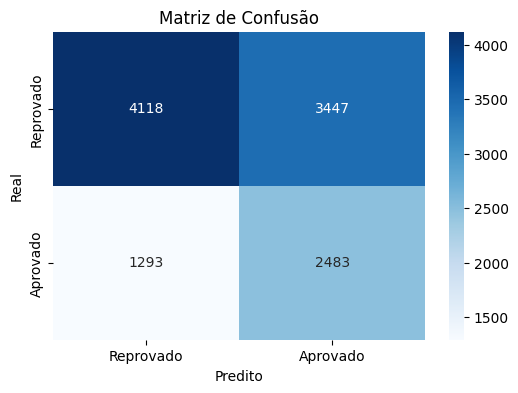

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dividir em treino e teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. (Opcional) Subamostra para acelerar durante ajustes (remova para treino final)
# X_train = X_train.sample(frac=0.5, random_state=42)
# y_train = y_train.loc[X_train.index]

# 3. Treinar o modelo com complexidade reduzida e balanceamento
modelo = RandomForestClassifier(
    n_estimators=30,        # 🔻 menos árvores (mais rápido)
    max_depth=10,           # 🔻 profundidade controlada (evita overfitting e acelera)
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
modelo.fit(X_train, y_train)

# 4. Prever
y_pred = modelo.predict(X_test)

# 5. Avaliar
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Reprovado', 'Aprovado'],
            yticklabels=['Reprovado', 'Aprovado'])
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

✅ Métricas gerais do modelo
Acurácia: 0.58 → o modelo acerta 58% das previsões totais.

F1-Score macro: 0.57 → equilíbrio entre precisão e recall entre as classes.

Classe 0 (Reprovado):

* Precisão: 0.76 → acerto ao prever reprovados.

* Recall: 0.54 → recupera pouco mais da metade dos reprovados reais.

Classe 1 (Aprovado):

* Precisão: 0.42 → taxa de erro mais alta ao aprovar.

* Recall: 0.66 → o modelo acerta 66% dos candidatos aprovados reais.


Optamos por priorizar o recall da classe "Aprovado", pois no contexto de recrutamento é mais aceitável aprovar um candidato indevidamente (que será filtrado na entrevista) do que deixar de considerar alguém com real potencial.
Assim, mesmo com precisão moderada, o modelo cumpre bem seu papel de triagem inicial inteligente, entregando uma lista qualificada de candidatos para análise humana posterior.

### Importância das variáveis no modelo
Utilizamos o atributo feature_importances_ do Random Forest para identificar quais variáveis tiveram maior peso nas decisões do modelo. O gráfico abaixo mostra as 20 variáveis mais relevantes na predição do sucesso dos candidatos, considerando tanto atributos textuais vetorizados (TF-IDF) quanto variáveis categóricas codificadas.

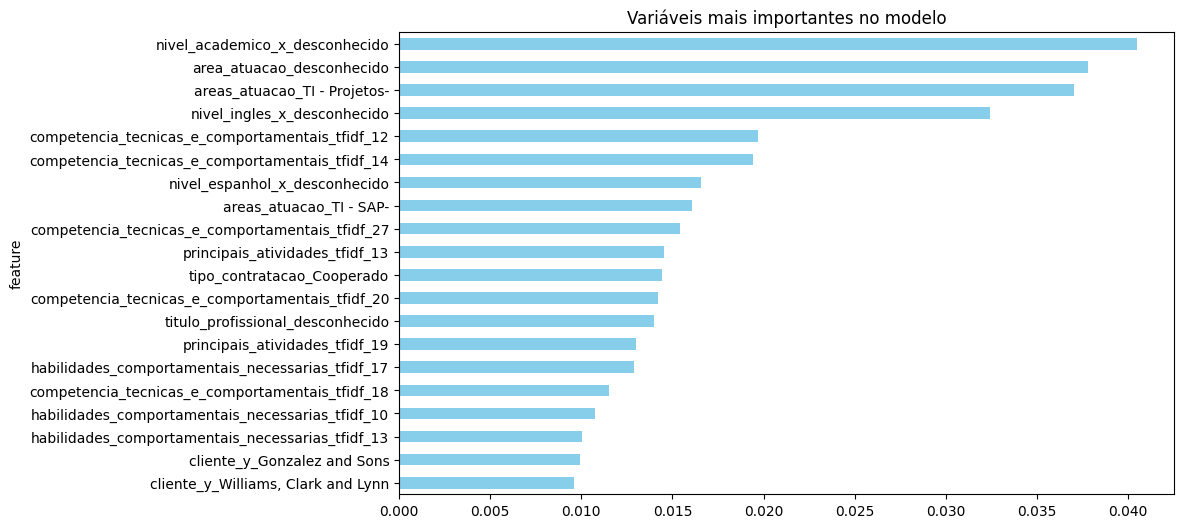

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = modelo.feature_importances_
features = X_train.columns

df_importancia = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Top 20
df_importancia.head(20).plot(
    x='feature', y='importance', kind='barh', figsize=(10, 6), legend=False, color='skyblue'
)
plt.title("Variáveis mais importantes no modelo")
plt.gca().invert_yaxis()
plt.show()


O gráfico mostra as 20 variáveis com maior importância no modelo Random Forest. As que mais influenciam a previsão do sucesso de um candidato são:

* nivel_academico_x_desconhecido, area_atuacao_desconhecido e nivel_ingles_x_desconhecido: a ausência de informações relevantes impacta negativamente a classificação, o que reforça a importância do preenchimento completo dos dados.

* Variáveis de competência_técnica e comportamental (TF-IDF) aparecem com peso significativo, indicando que o conteúdo dos campos textuais é essencial para o modelo.

* Algumas dummies específicas como tipo_contratacao_Cooperado e clientes específicos também aparecem, o que pode refletir padrões históricos da base da empresa.

O modelo conseguiu capturar uma combinação rica de informações textuais e categóricas, reforçando o potencial da abordagem híbrida com pré-processamento inteligente.

### Curva ROC e AUC (Área sob a Curva)
A Curva ROC compara a taxa de verdadeiros positivos (recall) contra a taxa de falsos positivos, em diferentes limiares de decisão do modelo. Quanto mais distante da diagonal (linha tracejada), melhor o desempenho.

AUC = {:.2f} → representa a capacidade do modelo de distinguir entre as classes. Quanto mais próximo de 1, melhor.

Este gráfico mostra que o modelo tem desempenho razoável na separação entre candidatos aprovados e reprovados, o que valida a estratégia adotada de priorizar recall e equilíbrio entre classes.

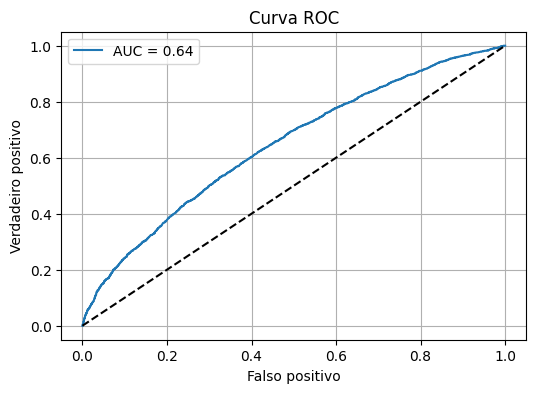

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()


A AUC de 0.64 indica que o modelo tem uma capacidade razoável de distinguir entre candidatos que foram aprovados e reprovados. Embora não seja um valor alto, ele está de acordo com a complexidade do problema e com o foco do projeto, que é a triagem inteligente e não a decisão final.

O modelo pode ser ajustado ou complementado com análises humanas, servindo como apoio eficaz ao processo de recrutamento da Decision.

### Matriz de Confusão Normalizada
A matriz de confusão abaixo apresenta as proporções de acerto e erro em cada classe, facilitando a interpretação do desempenho relativo:

* Cada linha representa a classe real

* Cada célula mostra a proporção de previsões que o modelo fez para cada classe

Essa visualização reforça que o modelo:

* Acerta boa parte dos aprovados reais (66%)

* Comete mais erros na classe “Reprovado”, confundindo uma parcela como aprovados

O comportamento está alinhado com a estratégia de priorizar recall na triagem inicial, aceitando alguns falsos positivos para não deixar bons candidatos de fora.

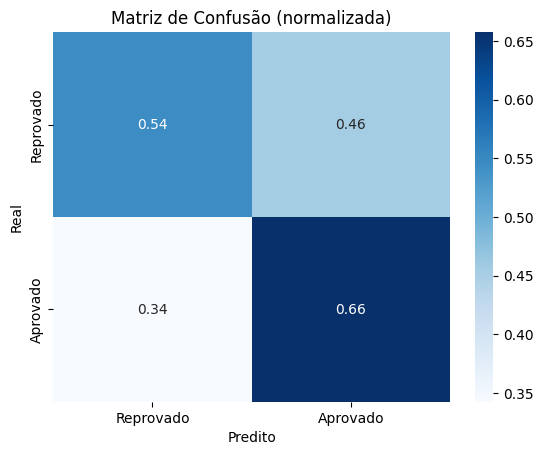

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')  # por linha
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f", xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.title("Matriz de Confusão (normalizada)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


A matriz de confusão normalizada confirma o comportamento do modelo:

* 66% dos aprovados reais foram corretamente identificados (recall alto para a classe positiva).

* Apenas 54% dos reprovados reais foram classificados corretamente, indicando uma maior taxa de falsos positivos — o que é esperado e aceitável no contexto de triagem inicial.

Essa visualização reforça a decisão estratégica de privilegiar recall na classe 1 (Aprovado), garantindo que talentos com bom potencial não sejam descartados na etapa automatizada.



---



 Salvando artefatos para deploy no Streamlit
Para viabilizar o uso do modelo em produção, salvamos os principais componentes que serão utilizados na aplicação do Streamlit:

* modelo.pkl: modelo Random Forest treinado.

* colunas_X.pkl: lista de colunas esperadas pelo modelo (garante consistência no input).

* tfidf_dict.pkl: dicionário com vetorizadores TF-IDF treinados para cada coluna de texto.

O salvamento foi feito com joblib, permitindo carregamento rápido e compatibilidade com o ambiente de deploy.

In [ ]:
# 🔐 Salvando modelo e vetores TF-IDF para deploy no Streamlit
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Lista de colunas de texto que foram vetorizadas
colunas_texto = [
    'objetivo_profissional',
    'conhecimentos_tecnicos',
    'principais_atividades',
    'competencia_tecnicas_e_comportamentais',
    'habilidades_comportamentais_necessarias'
]

# Recriar vetorizadores e salvar os corretos
tfidf_dict = {}
tfidf_dfs = []

for col in colunas_texto:
    print(f"Reprocessando TF-IDF para: {col}")
    tfidf = TfidfVectorizer(max_features=30)
    X_tfidf = tfidf.fit_transform(df_features[col].fillna(''))

    # Salvar o vetorizador
    tfidf_dict[col] = tfidf

    # Só para reconstrução do X, se necessário
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=[f"{col}_tfidf_{i}" for i in range(X_tfidf.shape[1])])
    tfidf_dfs.append(tfidf_df)

# Salvar modelo
joblib.dump(modelo, 'modelo.pkl')

# Salvar colunas esperadas pelo modelo
joblib.dump(list(X.columns), 'colunas_X.pkl')

# Salvar dicionário de vetores treinados
joblib.dump(tfidf_dict, 'tfidf_dict.pkl')

Reprocessando TF-IDF para: objetivo_profissional
Reprocessando TF-IDF para: conhecimentos_tecnicos
Reprocessando TF-IDF para: principais_atividades
Reprocessando TF-IDF para: competencia_tecnicas_e_comportamentais
Reprocessando TF-IDF para: habilidades_comportamentais_necessarias


['tfidf_dict.pkl']

Geração de amostra de candidatos para teste
Geramos um arquivo candidatos_teste.csv com 10 candidatos aleatórios, contendo todas as colunas necessárias para serem processadas na aplicação em Streamlit. Essa amostra é útil para:

Testar a aplicação de forma rápida

Garantir que o formato de entrada esteja correto

Demonstrar a funcionalidade do modelo em um cenário realista

In [ ]:
df_final[['nome', 'titulo_vaga', 'objetivo_profissional', 'conhecimentos_tecnicos', 'principais_atividades',
          'competencia_tecnicas_e_comportamentais', 'habilidades_comportamentais_necessarias',
          'area_atuacao', 'nivel_academico_x', 'nivel_ingles_x', 'nivel_espanhol_x',
          'titulo_profissional', 'cliente_y', 'tipo_contratacao', 'areas_atuacao']].sample(10).to_csv('candidatos_teste.csv', index=False)
